In [1]:
from Hallway import Hallway
import numpy as np
from random import choice
import matplotlib.pyplot as plt
import math

In [2]:
hall = Hallway()

In [3]:
def neib(s, states):
    neibs = []
    
    for k in [[-1, 0], [1, 0], [0, -1], [0, 1]]:
        n = (s[0]-k[0], s[1]-k[1])
        if n in states:
            neibs.append(n)
            
    return neibs

In [4]:
REPEATS = 10000
rs = np.zeros((30, REPEATS))
expected_rs = np.zeros((30, REPEATS))
for repetition in range(30):
    hall = Hallway()
    reward_model = {s: {st: 0.0 for st in list(hall._reward_means[s].keys()) } for s in hall._states}
    options_called_counter = 0
    while options_called_counter < REPEATS:
        for s in hall._states:
            o = choice(list(hall._reward_means[s].keys()))
            
            r, k = hall.execute(s, o)
            err = r - reward_model[s][o]
            reward_model[s][o] = reward_model[s][o] + ((1./4.) * err)

            rs[repetition][options_called_counter] = r
            expected_rs[repetition][options_called_counter] = reward_model[s][o]

            options_called_counter += 1
            if options_called_counter >= REPEATS:
                break

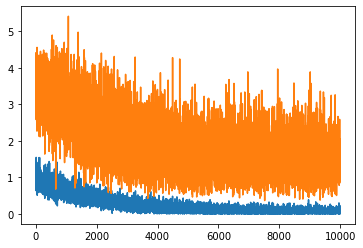

In [5]:
plt.plot(np.abs(np.mean(rs - expected_rs, 0)) )
plt.plot(np.max(np.abs(rs - expected_rs), 0))
plt.show()

In [ ]:
def __options_policy(s, final_state):
    # first room
    if (s[0] >= 7 and s[0] <= 11 and s[1] >= 1 and s[1] <= 5) or (s == (6, 2) and final_state == (10, 6)) or (s == (10, 6) and final_state == (6, 2)):
        if final_state == (6, 2):
            if s in [(7, 2),
                     (8, 1), (8, 2), (8, 3),
                     (9, 1), (9, 2), (9, 3),
                     (10, 1), (10, 2), (10, 3),
                     (11, 1), (11, 2), (11, 3)]:
                return Options.UP
            elif s in [(7, 4), (7, 5),
                       (8, 4), (8, 5),
                       (9, 4), (9, 5),
                       (10, 4), (10, 5),
                       (11, 4), (11, 5),
                       (7, 3), (10, 6)]:
                return Options.LEFT
            elif s in [(7, 1)]:
                return Options.RIGHT
            else:
                raise Exception('Failed ' + str(s))

        if final_state == (10, 6):
            if s in [(7, 1), (7, 2), (7, 3), (7, 4), (7, 5),
                     (8, 1), (8, 2), (8, 3), (8, 4), (8, 5),
                     (9, 5), (6, 2)]:
                return Options.DOWN
            elif s in [(9, 1), (9, 2), (9, 3), (9, 4),
                       (10, 1), (10, 2), (10, 3), (10, 4), (10, 5),
                       (11, 1), (11, 2), (11, 3), (11, 4)]:
                return Options.RIGHT
            elif s in [(11, 5)]:
                return Options.UP
            else:
                raise Exception('Failed ' + str(s))

    # second room
    elif (s[0] >= 1 and s[0] <= 5 and s[1] >= 1 and s[1] <= 5) or (s == (3, 6) and final_state == (6, 2)) or (s == (6, 2) and final_state == (3, 6)):
        if final_state == (3, 6):
            if s in [(1, 1), (1, 2), (1, 3), (1, 4),
                     (2, 1), (2, 2), (2, 3),
                     (3, 1), (3, 2), (3, 3), (3, 4), (3, 5),
                     (4, 1), (4, 2), (4, 3), (4, 4),
                     (5, 1), (5, 2), (5, 3)]:
                return Options.RIGHT
            elif s in [(1, 5), (2, 5), (2, 4)]:
                return Options.DOWN
            elif s in [(4, 5), (5, 4), (5, 5), (6, 2)]:
                return Options.UP
            else:
                raise Exception('Failed ' + str(s))

        if final_state == (6, 2):
            if s in [(1, 1), (1, 2), (1, 3),
                     (2, 1), (2, 2), (2, 3),
                     (3, 1), (3, 2), (3, 3),
                             (4, 2),
                             (5, 2)]:
                return Options.DOWN
            elif s in [(1, 4), (1, 5),
                       (2, 4), (2, 5),
                       (3, 4), (3, 5), (3, 6),
                       (4, 3), (4, 4), (4, 5),
                       (5, 3), (5, 4), (5, 5)]:
                return Options.LEFT
            elif s in [(4, 1), (5, 1)]:
                return Options.RIGHT
            else:
                raise Exception('Failed ' + str(s))

    # third room
    elif (s[0] >= 1 and s[0] <= 6 and s[1] >= 7 and s[1] <= 11) or (s == (3, 6) and final_state == (7, 9)) or (s == (7, 9) and final_state == (3, 6)):
        if final_state == (3, 6):
            if s in [(4, 7), (4, 8), (4, 9), (4, 10), (4, 11),
                     (5, 7), (5, 8), (5, 9), (5, 10), (5, 11),
                     (6, 7), (6, 8), (6, 9), (6, 10), (6, 11),
                     (7, 9)]:
                return Options.UP
            elif s in [(1, 8), (1, 9), (1, 10), (1, 11),
                       (2, 8), (2, 9), (2, 10), (2, 11),
                       (3, 7), (3, 8), (3, 9), (3, 10), (3, 11)]:
                return Options.LEFT
            elif s in [(1, 7), (2, 7)]:
                return Options.DOWN
            else:
                raise Exception('Failed ' + str(s))

        if final_state == (7, 9):
            if s in [(1, 7), (1, 8),
                     (2, 7), (2, 8),
                     (3, 6), (3, 7), (3, 8),
                     (4, 7), (4, 8),
                     (5, 7), (5, 8),
                     (6, 7), (6, 8)]:
                return Options.RIGHT
            elif s in [(1, 9), (1, 10), (1, 11),
                       (2, 9), (2, 10), (2, 11),
                       (3, 9), (3, 10), (3, 11),
                       (4, 9), (4, 10), (4, 11),
                       (5, 9), (5, 11),
                       (6, 9)]:
                return Options.DOWN
            elif s in [(5, 10), (6, 10), (6, 11)]:
                return Options.LEFT
            else:
                raise Exception('Failed ' + str(s))

    # fourth room
    elif (s[0] >= 8 and s[0] <= 11 and s[1] >= 7 and s[1] <= 11) or (s == (7, 9) and final_state == (10, 6)) or (s == (10, 6) and final_state == (7, 9)):
        if final_state == (7, 9):
            if s in [(8, 7), (8, 8), (10, 6)]:
                return Options.RIGHT
            elif s in [(9, 7), (9, 8), (9, 9), (9, 10), (9, 11),
                       (10, 7), (10, 8), (10, 9), (10, 10), (10, 11),
                       (11, 7), (11, 8), (11, 9), (11, 10), (11, 11), (8, 9)]:
                return Options.UP
            elif s in [(8, 10), (8, 11)]:
                return Options.LEFT
            else:
                raise Exception('Failed ' + str(s))

        if final_state == (10, 6):
            if s in [(8, 8), (8, 9), (8, 10), (8, 11),
                     (9, 8), (9, 9), (9, 10), (9, 11),
                     (10, 8), (10, 9), (10, 10), (10, 11),
                     (11, 8), (11, 9), (11, 10), (11, 11), (10, 7)]:
                return Options.LEFT
            elif s in [(8, 7), (9, 7), (7, 9)]:
                return Options.DOWN
            elif s in [(11, 7)]:
                return Options.UP
            else:
                raise Exception('Failed ' + str(s))
    else:
        raise Exception('Current state is invalid' + str(s))

In [6]:
REPEATS = 10000
rs = np.zeros((30, REPEATS))
expected_rs = np.zeros((30, REPEATS))
for repetition in range(30):
    hall = Hallway()
    reward_model = {s: {st: 0.0 for st in list(hall._reward_means[s].keys()) } for s in hall._states}
    options_called_counter = 0
    while options_called_counter < REPEATS:
        for s in hall._states:
            o = choice(list(hall._reward_means[s].keys()))
            
            if o in hall.primitive_step:
                r, next_s = hall.execute(s, o)
                err = r - reward_model[s][o]
                reward_model[s][o] = reward_model[s][o] + ((1./4.) * err)
                rs[repetition][options_called_counter] = r
                expected_rs[repetition][options_called_counter] = reward_model[s][o]
            else:
                option = o
                if option == Options.OUT_11:
                    final_state = (6, 2)
                elif option == Options.OUT_12:
                    final_state = (10, 6)
                elif option == Options.OUT_21:
                    final_state = (6, 2)
                elif option == Options.OUT_22:
                    final_state = (3, 6)
                elif option == Options.OUT_31:
                    final_state = (3, 6)
                elif option == Options.OUT_32:
                    final_state = (7, 9)
                elif option == Options.OUT_41:
                    final_state = (7, 9)
                elif option == Options.OUT_42:
                    final_state = (10, 6)

                k = 0
                while s != final_state:
                    k += 1

                    option = __options_policy(s, final_state)

                    # outside of the room!
                    if option is None:
                        break

                    r, s = hall.execute(s, option)

                    #total_r += (0.9 ** (k - 1)) * r



            options_called_counter += 1
            if options_called_counter >= REPEATS:
                break

AttributeError: 'Hallway' object has no attribute 'primitive_step'